In [1]:
print('Durian Leaf Diseases Classification and Detectoin Start')
print('Author:')
print('- Nguyễn Phan Đức Minh (Nguyen P.D. Minh)')
print('Corresponding Author:')
print('- Đỗ Minh Tiến (Tien Do)')

Durian Leaf Diseases Classification and Detectoin Start
Author:
- Nguyễn Phan Đức Minh (Nguyen P.D. Minh)
Corresponding Author:
- Đỗ Minh Tiến (Tien Do)


**Directories**

In [2]:
import torch 
import os 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
RAW_PATH = '/kaggle/input/durian-leaf-diseases/Data'
OUTPUT_PATH = '/kaggle/working/preprocessed_data'
SAVE_PATH = '/kaggle/working/'
SEED = 42
NUM_EPOCH = 100
BATCH_SIZE = 64
LEARNING_RATE = 1e-4
WEIGHT_DECAY = 1e-4
EARLY_STOP = 20
SAVE_PTH = '/kaggle/working/model_save.pth'

os.makedirs(OUTPUT_PATH, exist_ok=True)

print('Config ok roi hehehe')

Config ok roi hehehe


In [3]:
import os

print('Raw data structure:')
os.listdir(RAW_PATH)

Raw data structure:


['val', 'test', 'train']

In [4]:
TRAIN_PATH = '/kaggle/input/durian-leaf-diseases/Data/train'

print('Train data structure:')
os.listdir(TRAIN_PATH)

Train data structure:


['Leaf_Blight',
 'Leaf_Rhizoctonia',
 'Leaf_Phomopsis',
 'Leaf_Algal',
 'Leaf_Colletotrichum',
 'Leaf_Healthy']

**Figure 1. Ví dụ ảnh lá sầu riêng (mỗi lớp bệnh 1–2 ảnh)**

In [5]:
# import os
# import cv2
# import matplotlib.pyplot as plt
# import random

# data_path = '/kaggle/input/durian-leaf-diseases/Data/train'
# classes = ['Leaf_Blight', 'Leaf_Rhizoctonia', 'Leaf_Phomopsis',
#            'Leaf_Algal', 'Leaf_Colletotrichum', 'Leaf_Healthy']

# samples_per_class = 1
# sample_images = []

# # --- Lấy ảnh mẫu ---
# for cls in classes:
#     cls_path = os.path.join(data_path, cls)
#     imgs = os.listdir(cls_path)
#     chosen = random.sample(imgs, min(samples_per_class, len(imgs)))
#     for img_name in chosen:
#         img_path = os.path.join(cls_path, img_name)
#         img = cv2.imread(img_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         sample_images.append((cls, img))

# # --- Vẽ ảnh ---
# fig, axes = plt.subplots(len(classes), samples_per_class, figsize=(samples_per_class*3, len(classes)*3))

# # Nếu chỉ có 1 ảnh mỗi lớp → axes là mảng 1 chiều
# if samples_per_class == 1:
#     for i, (cls, img) in enumerate(sample_images):
#         axes[i].imshow(img)
#         axes[i].axis('off')
#         axes[i].set_ylabel(cls, rotation=0, labelpad=50, fontsize=12, va='center')
# else:
#     for i, cls in enumerate(classes):
#         for j in range(samples_per_class):
#             axes[i, j].imshow(sample_images[i*samples_per_class + j][1])
#             axes[i, j].axis('off')
#             if j == 0:
#                 axes[i, j].set_ylabel(cls, rotation=0, labelpad=50, fontsize=12, va='center')

# # --- Tiêu đề + lưu hình ---
# plt.suptitle("Figure 1. Ví dụ ảnh lá sầu riêng (mỗi lớp bệnh 1 ảnh)", fontsize=14, fontweight='bold', y=0.92)
# plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.savefig("Figure1_Durian_Leaf_Examples.png", dpi=300, bbox_inches='tight')
# plt.show()


**Figure 2. Biểu đồ cột phân bố số ảnh theo từng lớp bệnh**

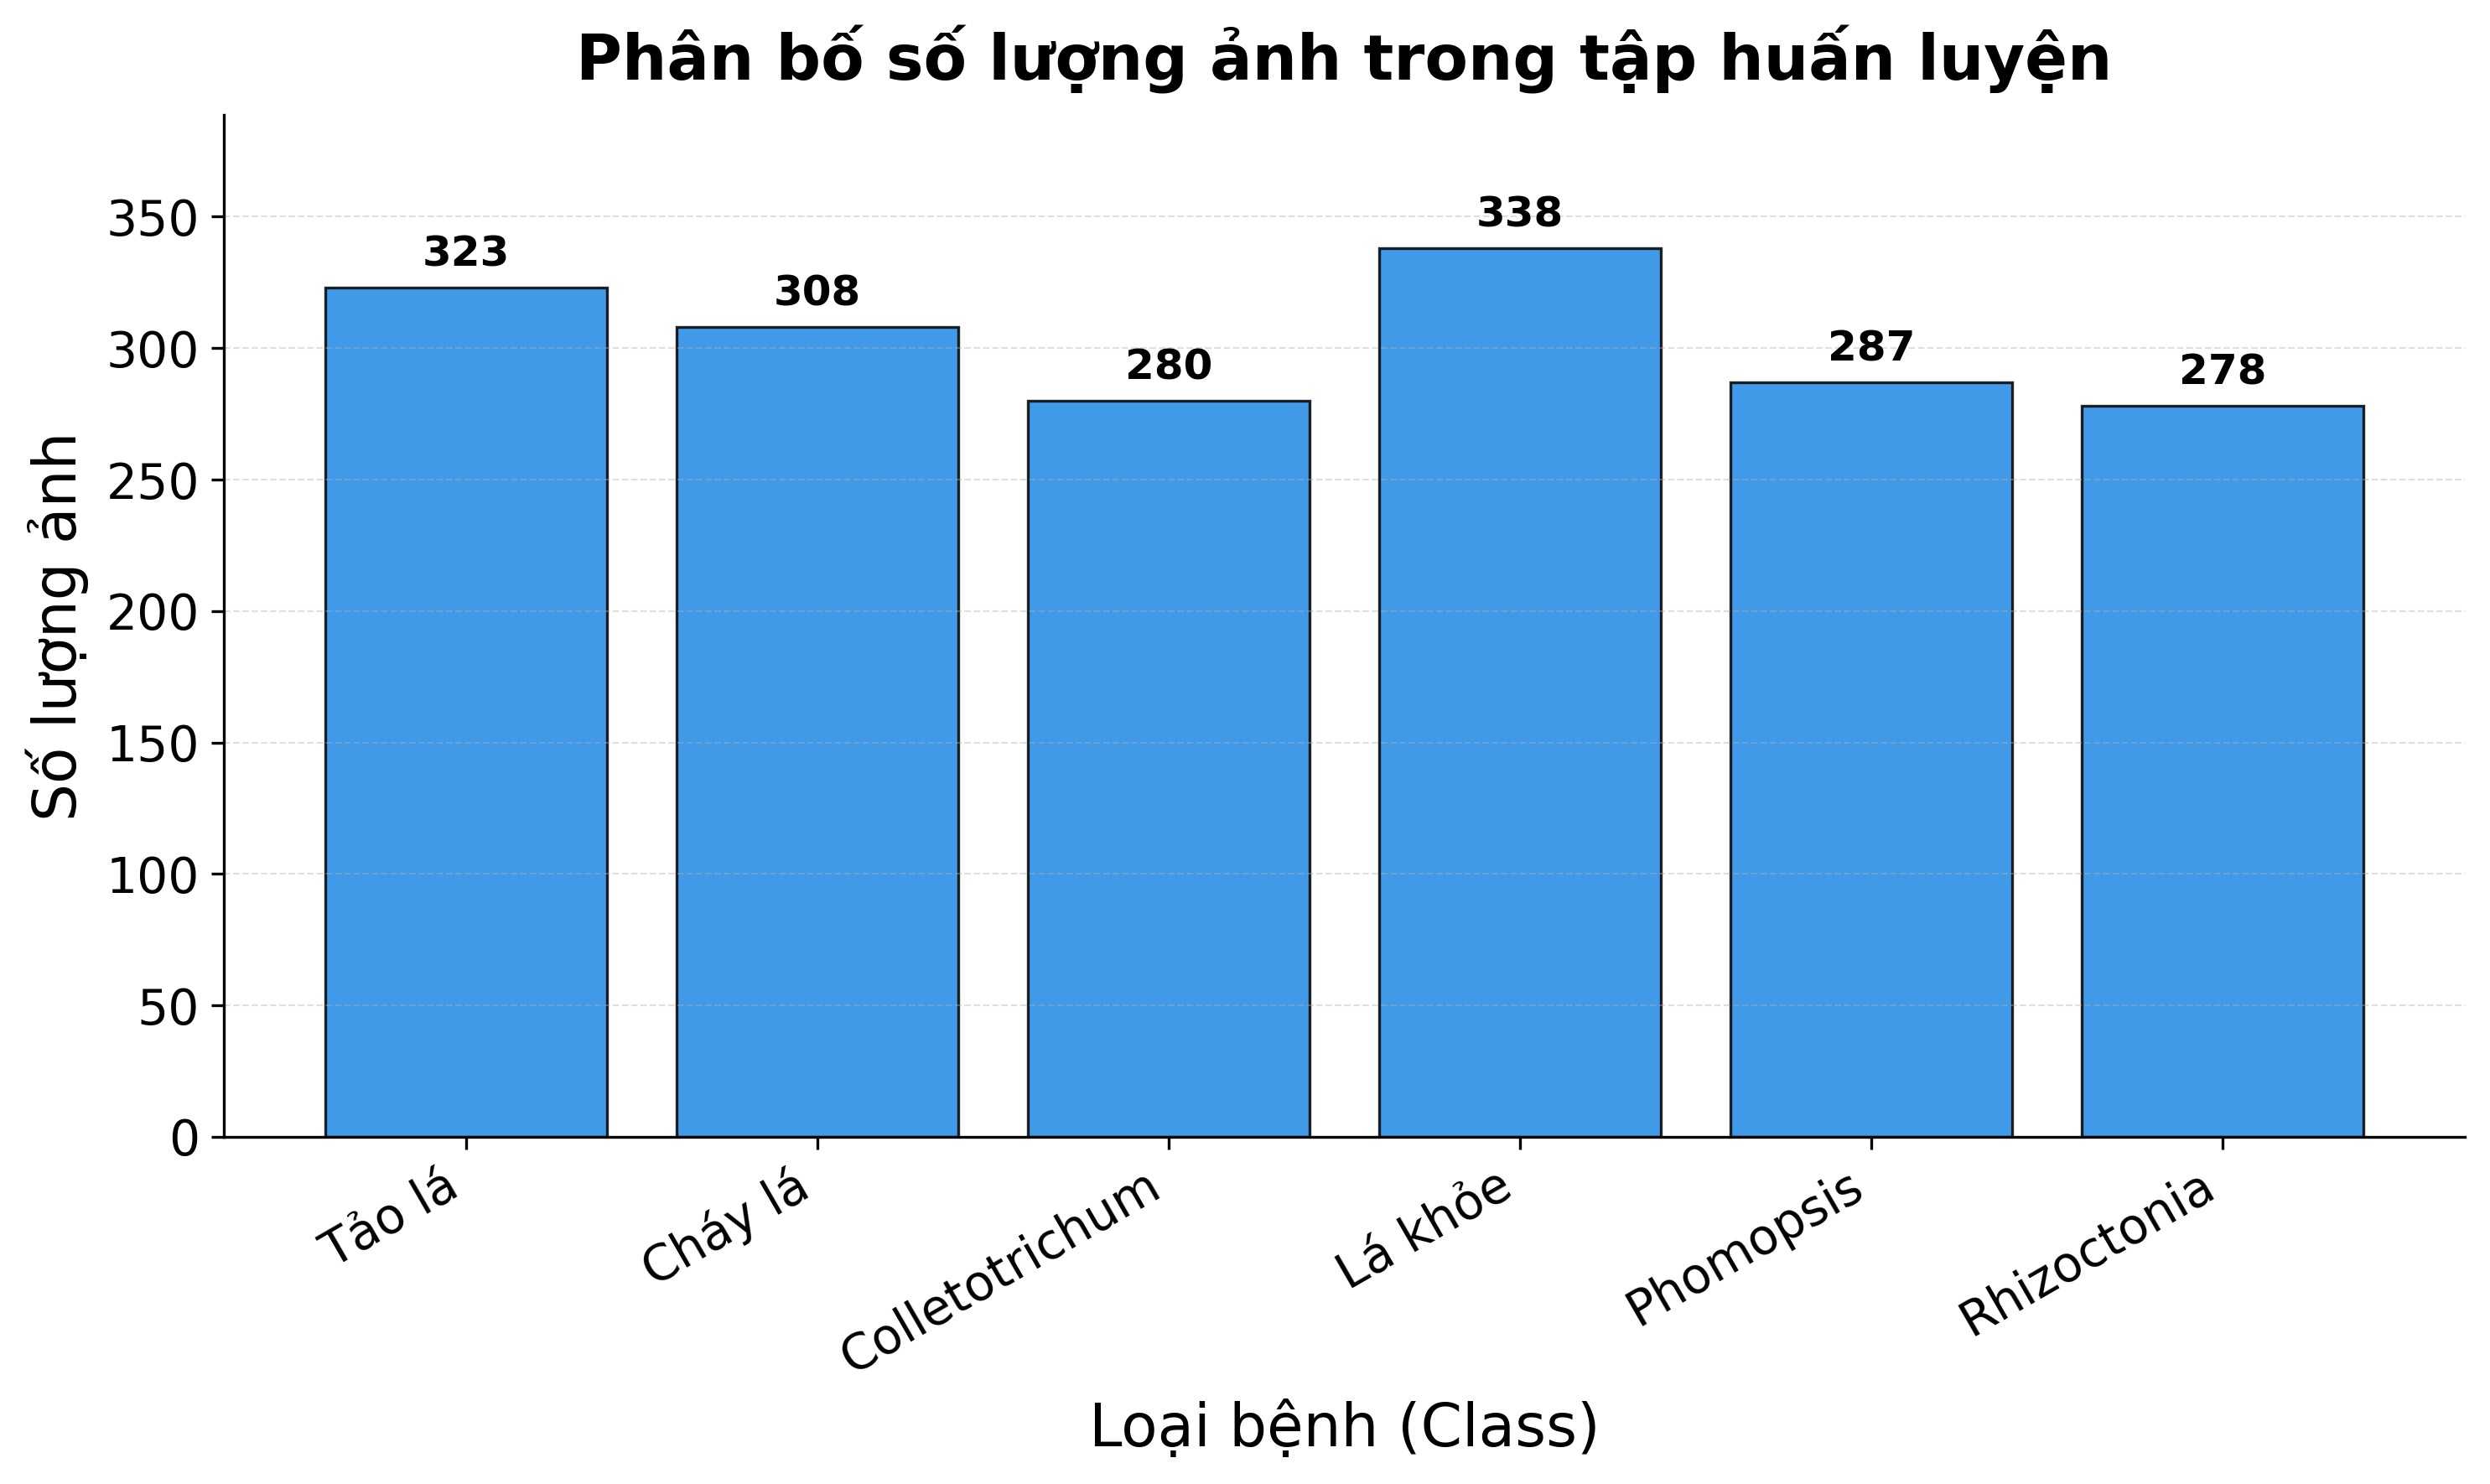

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

# --- Cấu hình hiển thị học thuật ---
mpl.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'axes.titlesize': 18,
    'axes.labelsize': 17,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'figure.dpi': 300,
})

# --- Đường dẫn dataset ---
data_path = RAW_PATH  # ví dụ: '/kaggle/input/durian-leaf-diseases/Data'
split = 'train'

# --- Đếm số ảnh trong từng lớp ---
train_path = os.path.join(data_path, split)
class_counts = {}
for cls in os.listdir(train_path):
    cls_path = os.path.join(train_path, cls)
    if os.path.isdir(cls_path):
        class_counts[cls] = len(os.listdir(cls_path))

# --- Sắp xếp theo tên lớp ---
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[0]))

# --- Mapping sang tên tiếng Việt ngắn gọn ---
name_map = {
    'Leaf_Blight': 'Cháy lá',
    'Leaf_Rhizoctonia': 'Rhizoctonia',
    'Leaf_Phomopsis': 'Phomopsis',
    'Leaf_Algal': 'Tảo lá',
    'Leaf_Colletotrichum': 'Colletotrichum',
    'Leaf_Healthy': 'Lá khỏe'
}

# --- Đổi tên lớp sang tiếng Việt ---
class_counts_vi = {name_map.get(k, k): v for k, v in class_counts.items()}

# --- Vẽ biểu đồ ---
plt.figure(figsize=(10, 6))
bars = plt.bar(
    class_counts_vi.keys(),
    class_counts_vi.values(),
    color='#1E88E5',       # xanh dương học thuật
    edgecolor='black',
    linewidth=0.8,
    alpha=0.85
)

# --- Thêm nhãn số trên đầu cột ---
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + (max(class_counts_vi.values()) * 0.015),
        f'{yval}',
        ha='center', va='bottom',
        fontsize=12,
        fontname='Times New Roman',
        weight='bold'
    )

# --- Tùy chỉnh trục & tiêu đề ---
plt.ylim(0, max(class_counts_vi.values()) * 1.15)
plt.xticks(rotation=30, ha='right')
plt.ylabel('Số lượng ảnh', labelpad=5)
plt.xlabel('Loại bệnh (Class)', labelpad=5)
plt.title('Phân bố số lượng ảnh trong tập huấn luyện', pad=10, weight='bold')

# --- Tinh chỉnh khung và grid ---
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.4)

# --- Hiển thị ---
plt.tight_layout()
plt.show()

**1/ Preprocessing**

**Figure 4. Minh họa trước & sau xử lý: Original → Preprocessing → Augmentation**

In [7]:
# !pip install rembg
# !pip install rembg onnxruntime-gpu

In [8]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from rembg import remove
# from PIL import Image
# import os
# from glob import glob

# # --- Dataset path ---
# dataset_path = "/kaggle/input/durian-leaf-diseases/Data/train"

# # --- Lấy danh sách class ---
# classes = sorted(os.listdir(dataset_path))

# # --- Số ảnh muốn thử mỗi class ---
# N = 100

# for cls in classes:
#     img_files = glob(os.path.join(dataset_path, cls, "*.jpg"))[:N]

#     plt.figure(figsize=(20, 20))   # 20x20 cho vuông đẹp hơn
#     plt.suptitle(f"Class: {cls}", fontsize=20)

#     for i, img_path in enumerate(img_files, 1):
#         # Load ảnh gốc
#         input_pil = Image.open(img_path).resize((400, 400))
        
#         # Tách nền bằng U²-Net (rembg, CPU)
#         output_pil = remove(input_pil)  # RGBA
        
#         # Convert về numpy BGR để hiển thị
#         img_rembg = cv2.cvtColor(np.array(output_pil.convert("RGB")), cv2.COLOR_RGB2BGR)

#         # Hiển thị 10 hàng x 10 cột
#         plt.subplot(10, 10, i)
#         plt.imshow(cv2.cvtColor(img_rembg, cv2.COLOR_BGR2RGB))
#         plt.axis("off")
#         plt.title(f"{i}", fontsize=8)

#     plt.subplots_adjust(top=0.93, wspace=0.05, hspace=0.05)  # tránh overlap
#     plt.show()

In [9]:
# import cv2
# import numpy as np
# import os
# from glob import glob
# import sys
# import matplotlib.pyplot as plt
# from rembg import remove
# from PIL import Image  

# # --- Hàm tiền xử lý ảnh mới: U²-Net + CLAHE + Blur + Sharpening ---
# def preprocess_leaf_image(image_path):
#     # 1. Load ảnh và resize (224x224)
#     input_pil = Image.open(image_path).resize((224, 224))
    
#     # 2. Remove background bằng U²-Net (rembg)
#     output_pil = remove(input_pil)   # RGBA
#     img = cv2.cvtColor(np.array(output_pil.convert("RGB")), cv2.COLOR_RGB2BGR)

#     # 3. CLAHE
#     lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
#     l, a, b = cv2.split(lab)
#     clahe = cv2.createCLAHE(clipLimit=2.0)
#     cl = clahe.apply(l)
#     lab = cv2.merge((cl, a, b))
#     img_clahe = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

#     # 4. Gaussian Blur + Sharpening
#     blur = cv2.GaussianBlur(img_clahe, (5,5), 1.0)
#     img_final = cv2.addWeighted(img_clahe, 1.5, blur, -0.5, 0)

#     return img_final


# # --- Áp dụng cho train / val / test ---
# splits = ['train', 'val', 'test']

# for split in splits:
#     split_input_path = os.path.join(RAW_PATH, split)
#     split_output_path = os.path.join(OUTPUT_PATH, split)
#     os.makedirs(split_output_path, exist_ok=True)
    
#     classes = [cls for cls in os.listdir(split_input_path) if os.path.isdir(os.path.join(split_input_path, cls))]
    
#     for cls in classes:
#         input_cls_path = os.path.join(split_input_path, cls)
#         output_cls_path = os.path.join(split_output_path, cls)
#         os.makedirs(output_cls_path, exist_ok=True)
        
#         img_files = glob(os.path.join(input_cls_path, '*.jpg'))
#         total = len(img_files)
#         processed_imgs = []
        
#         for idx, img_file in enumerate(img_files, 1):
#             percent = idx / total * 100
#             print(f'\rProcessing {split}/{cls}: {percent:.2f}% ({idx}/{total})', end='')
#             sys.stdout.flush()
            
#             if split in ['train', 'val']:
#                 img_processed = preprocess_leaf_image(img_file)
#             else:  # test giữ nguyên (resize cơ bản)
#                 img = Image.open(img_file).resize((224, 224))
#                 img_processed = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
            
#             filename = os.path.basename(img_file)
#             cv2.imwrite(os.path.join(output_cls_path, filename), img_processed)
            
#             if len(processed_imgs) < 20:
#                 processed_imgs.append(cv2.cvtColor(img_processed, cv2.COLOR_BGR2RGB))
#         print()
        
#         # Hiển thị 20 ảnh mẫu sau xử lý
#         if processed_imgs:
#             plt.figure(figsize=(15,12))
#             for i, img_show in enumerate(processed_imgs, 1):
#                 plt.subplot(4,5,i)
#                 plt.imshow(img_show)
#                 plt.axis('off')
#                 plt.title(f'{cls}-{i}')
#             plt.tight_layout()
#             plt.show()


In [10]:
# import shutil

# # Đường dẫn thư mục cần nén
# folder_path = "/kaggle/working/preprocessed_data"

# # Đường dẫn file ZIP đầu ra
# output_zip = "/kaggle/working/preprocessed_data.zip"

# # Nén thư mục
# shutil.make_archive(output_zip.replace('.zip',''), 'zip', folder_path)

# print("Đã tạo file ZIP:", output_zip)

**2/ Data Preparation**

**--2.1/ Classification**

In [11]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import os

# --- Transformations ---
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0), ratio=(0.95, 1.05)),
    transforms.RandomHorizontalFlip(p=0.8),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4860, 0.5331, 0.3375],
                         std=[0.2487, 0.2287, 0.2422]),
    transforms.RandomErasing(p=0.2, scale=(0.01, 0.1), ratio=(0.3, 3.3), value=0)
])

test_val_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4860, 0.5331, 0.3375],
                         std=[0.2487, 0.2287, 0.2422])
])

# --- Dataset ---
train_dataset = ImageFolder(root=os.path.join(RAW_PATH, "train"), transform=train_transform)
val_dataset   = ImageFolder(root=os.path.join(RAW_PATH, "val"),   transform=test_val_transform)
test_dataset  = ImageFolder(root=os.path.join(RAW_PATH, "test"),  transform=test_val_transform)

# --- DataLoader ---
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True,num_workers=8, pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=BATCH_SIZE, shuffle=False,num_workers=8, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=BATCH_SIZE, shuffle=False,num_workers=8, pin_memory=True)

print(f"Train size: {len(train_dataset)}")
print(f"Val size:   {len(val_dataset)}")
print(f"Test size:  {len(test_dataset)}")

Train size: 1814
Val size:   387
Test size:  394


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [12]:
# import matplotlib.pyplot as plt
# from PIL import Image
# import numpy as np
# import torch
# import torchvision.transforms as transforms

# # --- Hàm hiển thị ảnh ---
# def imshow(img, mean=[0.4860, 0.5331, 0.3375], std=[0.2487, 0.2287, 0.2422]):
#     if isinstance(img, torch.Tensor):
#         img = img.numpy().transpose((1, 2, 0))
#         img = img * np.array(std) + np.array(mean)
#         img = np.clip(img, 0, 1)
#     return img

# # --- Ảnh gốc ---
# img_path = train_dataset.samples[0][0]
# img_pil = Image.open(img_path).convert("RGB").resize((256, 256))

# # --- 100% augmentation ---
# aug_transforms = [
#     ("Original", lambda x: x),
#     ("RandomResizedCrop", lambda x: transforms.functional.resized_crop(x, top=10, left=10, height=200, width=200, size=(224,224))),
#     ("HorizontalFlip", lambda x: transforms.functional.hflip(x)),
#     ("RandomAffine", lambda x: transforms.functional.affine(x, angle=10, translate=(10,10), scale=1.1, shear=5)),
#     ("ColorJitter", lambda x: transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.05)(x)),
#     ("GaussianBlur", lambda x: transforms.GaussianBlur(kernel_size=5, sigma=1.0)(x)),
#     ("RandomErasing", lambda x: transforms.RandomErasing(p=1.0, scale=(0.05,0.1), ratio=(0.3,3.3), value=0)(transforms.ToTensor()(x))),
#     ("Full Pipeline", train_dataset.transform)
# ]

# # --- Figure 2x4 ---
# rows, cols = 2, 4
# fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
# axes = axes.flatten()
# fig.suptitle("Augmentation examples (100% applied)", fontsize=16)

# for i, (name, aug) in enumerate(aug_transforms):
#     aug_img = aug(img_pil)
#     axes[i].imshow(imshow(aug_img))
#     axes[i].set_title(name, fontsize=8)
#     axes[i].axis('off')

# plt.subplots_adjust(wspace=0.2, hspace=0.4)
# plt.show()

**--2.2/ Detection**

In [13]:
# import torch
# from torch.utils.data import Dataset, DataLoader, random_split
# import os
# import cv2
# import random

# # --- YOLO Detection Dataset ---
# class YOLODetectionDataset(Dataset):
#     def __init__(self, images_dir, transform=None):
#         self.images = sorted([f for f in os.listdir(images_dir) if f.endswith('.jpg')])
#         self.images_dir = images_dir
#         self.transform = transform

#     def __len__(self):
#         return len(self.images)

#     def __getitem__(self, idx):
#         img_name = self.images[idx]
#         img_path = os.path.join(self.images_dir, img_name)
#         txt_path = os.path.join(self.images_dir, img_name.replace('.jpg', '.txt'))
        
#         # Đọc ảnh
#         img = cv2.imread(img_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         h, w, _ = img.shape
        
#         # Đọc YOLO labels
#         boxes = []
#         labels = []
#         if os.path.exists(txt_path):
#             with open(txt_path, 'r') as f:
#                 for line in f.readlines():
#                     parts = line.strip().split()
#                     if len(parts) != 5:
#                         continue
#                     cls_id, x_c, y_c, bw, bh = map(float, parts)
#                     # Chuyển từ YOLO normalized -> pixel coords x1,y1,x2,y2
#                     x1 = (x_c - bw/2) * w
#                     y1 = (y_c - bh/2) * h
#                     x2 = (x_c + bw/2) * w
#                     y2 = (y_c + bh/2) * h
#                     boxes.append([x1, y1, x2, y2])
#                     labels.append(int(cls_id))
        
#         boxes = torch.tensor(boxes, dtype=torch.float32)
#         labels = torch.tensor(labels, dtype=torch.int64)
#         target = {'boxes': boxes, 'labels': labels}

#         # Transform (resize + flip)
#         if self.transform:
#             img, target = self.transform(img, target)
        
#         # ToTensor
#         img = torch.tensor(img).permute(2,0,1).float() / 255.0
#         return img, target

# # --- Transform for YOLO detection ---
# def yolo_transform(img, target):
#     # Resize image to 224x224
#     h, w, _ = img.shape
#     img = cv2.resize(img, (224, 224))
#     scale_x = 224 / w
#     scale_y = 224 / h
#     boxes = target['boxes']
#     if boxes.shape[0] > 0:
#         boxes[:, [0,2]] = boxes[:, [0,2]] * scale_x
#         boxes[:, [1,3]] = boxes[:, [1,3]] * scale_y
#         target['boxes'] = boxes

#     # Random horizontal flip
#     if random.random() > 0.5 and boxes.shape[0] > 0:
#         img = cv2.flip(img, 1)
#         boxes[:, [0,2]] = 224 - boxes[:, [2,0]]
#         target['boxes'] = boxes

#     return img, target

# # --- Dataset & DataLoader ---
# images_dir = os.path.join(OUTPUT_PATH, 'images')  # chứa img + txt
# full_dataset = YOLODetectionDataset(images_dir, transform=yolo_transform)

# # train/val split
# total_size = len(full_dataset)
# train_size = int(0.8 * total_size)
# val_size = total_size - train_size
# train_dataset, val_dataset = random_split(
#     full_dataset, [train_size, val_size],
#     generator=torch.Generator().manual_seed(SEED)
# )

# # DataLoader với collate_fn
# def collate_fn(batch):
#     return tuple(zip(*batch))

# train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
# val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# print(f'Train size: {len(train_dataset)}')
# print(f'Val size: {len(val_dataset)}')

**5/ Model Architecture**

**--5.1/ Classification**

**----5.1.1/ EfficientNetB0**

In [14]:
import torch
import torch.nn as nn
from torchvision.models import mobilenet_v3_small
import torch.nn.functional as F
# ===========================
# DurNet: MobileNetV3-Small + Tiny ViT + Dropout
# ===========================
class DurNet(nn.Module):
    def __init__(
        self, 
        num_classes=6, 
        img_size=224, 
        patch_dim=128, 
        num_transformer_layers=2, 
        dropout_rate=0.5
    ):
        super().__init__()
        # ------------------------
        # MobileNetV3-Small backbone
        # ------------------------
        self.backbone = mobilenet_v3_small(pretrained=True)
        self.backbone_features = self.backbone.features  # [B, C, H', W']
        self.backbone_out_channels = 576  # output channel của MobileNetV3-Small

        # ------------------------
        # Patch embedding
        # ------------------------
        self.patch_proj = nn.Linear(self.backbone_out_channels, patch_dim)
        self.patch_dropout = nn.Dropout(dropout_rate)

        self.cls_token = nn.Parameter(torch.zeros(1, 1, patch_dim))
        self.pos_embed = nn.Parameter(torch.zeros(1, 50, patch_dim))  # tạm thời, resize trong forward

        # ------------------------
        # Tiny Transformer
        # ------------------------
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=patch_dim,
            nhead=4,
            dim_feedforward=patch_dim * 2,
            dropout=dropout_rate,
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_transformer_layers)

        # ------------------------
        # Classification head
        # ------------------------
        self.norm = nn.LayerNorm(patch_dim)
        self.head_dropout = nn.Dropout(dropout_rate)
        self.head = nn.Linear(patch_dim, num_classes)

        # ------------------------
        # Weight initialization
        # ------------------------
        nn.init.trunc_normal_(self.cls_token, std=0.02)
        nn.init.trunc_normal_(self.pos_embed, std=0.02)
        nn.init.trunc_normal_(self.head.weight, std=0.02)
        nn.init.constant_(self.head.bias, 0)

    def forward(self, x):
        # ------------------------
        # Backbone feature extraction
        # ------------------------
        f = self.backbone_features(x)  # [B, C, H, W]
        B, C, H, W = f.shape

        # Flatten H*W thành tokens
        tokens = f.flatten(2).transpose(1, 2)  # [B, N, C]
        tokens = self.patch_proj(tokens)       # [B, N, D]
        tokens = self.patch_dropout(tokens)

        # Thêm CLS token
        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, tokens), dim=1)  # [B, N+1, D]

        # Resize positional embedding nếu cần
        if self.pos_embed.shape[1] != x.shape[1]:
            self.pos_embed = nn.Parameter(
                torch.zeros(1, x.shape[1], self.pos_embed.shape[2], device=x.device)
            )
        x = x + self.pos_embed

        # Transformer
        x = self.transformer(x)

        # Classification using CLS token
        cls_out = self.norm(x[:, 0])
        cls_out = self.head_dropout(cls_out)
        out = self.head(cls_out)
        return out

**--5.2/ Detection**

**Training**

In [15]:
class EarlyStopping:
    def __init__(self, patience=3, delta=0, path=SAVE_PATH):
        self.patience = patience
        self.delta = delta
        self.path = path
        self.best_loss = float('inf')
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
            torch.save(model.state_dict(), self.path)
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

In [16]:
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=None):
        super().__init__()
        self.gamma = gamma
        self.alpha = alpha

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha.gather(0, targets)
            focal_loss *= alpha_t
        return focal_loss.mean()

In [17]:
class LabelSmoothingLoss(nn.Module):
    def __init__(self, classes, smoothing=0.1):
        super(LabelSmoothingLoss, self).__init__()
        self.confidence = 1.0 - smoothing
        self.smoothing = smoothing
        self.cls = classes
        self.criterion = nn.KLDivLoss(reduction='batchmean')

    def forward(self, pred, target):
        pred = pred.log_softmax(dim=-1)
        true_dist = torch.zeros_like(pred)
        true_dist.fill_(self.smoothing / (self.cls - 1))
        true_dist.scatter_(1, target.data.unsqueeze(1), self.confidence)
        return self.criterion(pred, true_dist)

In [18]:
def print_model_parameters(model):
    total_params = 0
    print("\n===== SỐ LƯỢNG THAM SỐ MỖI MÔ HÌNH =====")
    for name, module in model.named_children():
        params = sum(p.numel() for p in module.parameters() if p.requires_grad)
        total_params += params
        print(f"{name:<25}: {params:,}")
    print(f"{'Tổng số tham số':<25}: {total_params:,}\n")

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import timm

model = DurNet(num_classes=6).to(device)

def count_trainable_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Số lượng tham số đang học: {count_trainable_params(model):,}")

criterion = FocalLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=400)
early_stopping = EarlyStopping(patience=15, delta=0.01, path=SAVE_PTH)

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    train_acc_l, train_loss_l, val_acc_l, val_loss_l = [], [], [], []

    total_start_time = time.time()
    
    for epochs in range(num_epochs):
        epoch_start_time = time.time()
        model.train()
        t_loss = 0.
        t_correct, t_total = 0, 0

        loop = tqdm(train_loader, desc=f"Epoch {epochs+1}/{num_epochs}")
        for images, labels in loop:
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            t_loss += loss.item()

            _, train_predict = torch.max(outputs.data, 1)
            t_correct += (train_predict == labels).sum().item()
            t_total += labels.size(0)

        train_loss = t_loss/len(train_loader)
        train_acc = t_correct/t_total * 100
        train_loss_l.append(train_loss)
        train_acc_l.append(train_acc)

        model.eval()
        v_loss = 0.
        v_correct, v_total = 0, 0
        
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                v_loss += loss.item()

                _, v_predict = torch.max(outputs.data, 1)
                v_correct += (v_predict == labels).sum().item()
                v_total += labels.size(0)

        val_loss = v_loss/len(val_loader)
        val_acc = v_correct/v_total * 100
        val_loss_l.append(val_loss)
        val_acc_l.append(val_acc)
        epoch_time = time.time() - epoch_start_time

        print(f'{epochs+1}/{num_epochs}: t_acc: {train_acc: .2f}, t_loss: {train_loss: .2f}, v_acc: {val_acc: .2f}, v_loss: {val_loss: .2f}, time: {epoch_time:.2f}s')
        
        scheduler.step(val_loss)
        
        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            break

    total_time = time.time() - total_start_time
    print(f"Tổng thời gian huấn luyện: {total_time/60:.2f} phút")

    y_pred_class, y_true_class = [], []
    model.eval()
    
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predict = torch.max(outputs.data, 1)
            y_pred_class.extend(predict.cpu().numpy())
            y_true_class.extend(labels.cpu().numpy())

    model.load_state_dict(torch.load(SAVE_PTH))
    return train_acc_l, train_loss_l, val_acc_l, val_loss_l, y_pred_class, y_true_class

train_acc_l, train_loss_l, val_acc_l, val_loss_l, y_pred_class, y_true_class = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=400)
torch.save(model.state_dict(), SAVE_PTH)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 51.3MB/s]


Số lượng tham số đang học: 2,889,230


Epoch 1/400:   0%|          | 0/29 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 1/400: 100%|██████████| 29/29 [00:13<00:00,  2.13it/s]
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:243: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use 

1/400: t_acc:  22.49, t_loss:  1.23, v_acc:  43.15, v_loss:  1.09, time: 15.06s


Epoch 2/400: 100%|██████████| 29/29 [00:12<00:00,  2.38it/s]


2/400: t_acc:  40.74, t_loss:  1.01, v_acc:  57.62, v_loss:  0.93, time: 13.55s


Epoch 3/400: 100%|██████████| 29/29 [00:12<00:00,  2.37it/s]


3/400: t_acc:  56.67, t_loss:  0.81, v_acc:  70.03, v_loss:  0.80, time: 13.60s


Epoch 4/400: 100%|██████████| 29/29 [00:12<00:00,  2.39it/s]


4/400: t_acc:  69.07, t_loss:  0.62, v_acc:  73.90, v_loss:  0.64, time: 13.47s


Epoch 5/400: 100%|██████████| 29/29 [00:12<00:00,  2.40it/s]


5/400: t_acc:  75.47, t_loss:  0.48, v_acc:  75.97, v_loss:  0.53, time: 13.49s


Epoch 6/400: 100%|██████████| 29/29 [00:12<00:00,  2.35it/s]


6/400: t_acc:  78.94, t_loss:  0.38, v_acc:  78.04, v_loss:  0.43, time: 13.73s


Epoch 7/400: 100%|██████████| 29/29 [00:12<00:00,  2.38it/s]


7/400: t_acc:  82.36, t_loss:  0.31, v_acc:  81.40, v_loss:  0.34, time: 13.50s


Epoch 8/400: 100%|██████████| 29/29 [00:12<00:00,  2.35it/s]


8/400: t_acc:  83.13, t_loss:  0.26, v_acc:  81.40, v_loss:  0.35, time: 13.75s


Epoch 9/400: 100%|██████████| 29/29 [00:12<00:00,  2.35it/s]


9/400: t_acc:  84.29, t_loss:  0.24, v_acc:  86.05, v_loss:  0.27, time: 13.76s


Epoch 10/400: 100%|██████████| 29/29 [00:12<00:00,  2.34it/s]


10/400: t_acc:  87.16, t_loss:  0.20, v_acc:  89.41, v_loss:  0.22, time: 13.77s


Epoch 11/400: 100%|██████████| 29/29 [00:12<00:00,  2.30it/s]


11/400: t_acc:  89.20, t_loss:  0.17, v_acc:  90.18, v_loss:  0.19, time: 13.99s


Epoch 12/400: 100%|██████████| 29/29 [00:12<00:00,  2.36it/s]


12/400: t_acc:  90.08, t_loss:  0.16, v_acc:  91.21, v_loss:  0.14, time: 13.69s


Epoch 13/400: 100%|██████████| 29/29 [00:12<00:00,  2.37it/s]


13/400: t_acc:  89.97, t_loss:  0.14, v_acc:  92.76, v_loss:  0.10, time: 13.72s


Epoch 14/400: 100%|██████████| 29/29 [00:12<00:00,  2.36it/s]


14/400: t_acc:  91.57, t_loss:  0.13, v_acc:  93.28, v_loss:  0.11, time: 13.65s


Epoch 15/400: 100%|██████████| 29/29 [00:12<00:00,  2.39it/s]


15/400: t_acc:  92.28, t_loss:  0.11, v_acc:  93.80, v_loss:  0.11, time: 13.46s


Epoch 16/400: 100%|██████████| 29/29 [00:12<00:00,  2.35it/s]


16/400: t_acc:  92.12, t_loss:  0.11, v_acc:  94.57, v_loss:  0.10, time: 13.68s


Epoch 17/400: 100%|██████████| 29/29 [00:12<00:00,  2.42it/s]


17/400: t_acc:  92.89, t_loss:  0.10, v_acc:  94.83, v_loss:  0.08, time: 13.35s


Epoch 18/400: 100%|██████████| 29/29 [00:11<00:00,  2.42it/s]


18/400: t_acc:  93.38, t_loss:  0.10, v_acc:  94.06, v_loss:  0.10, time: 13.36s


Epoch 19/400: 100%|██████████| 29/29 [00:11<00:00,  2.42it/s]


19/400: t_acc:  94.60, t_loss:  0.08, v_acc:  94.32, v_loss:  0.09, time: 13.31s


Epoch 20/400: 100%|██████████| 29/29 [00:12<00:00,  2.37it/s]


20/400: t_acc:  94.32, t_loss:  0.08, v_acc:  93.80, v_loss:  0.09, time: 13.62s


Epoch 21/400: 100%|██████████| 29/29 [00:12<00:00,  2.39it/s]


21/400: t_acc:  95.59, t_loss:  0.07, v_acc:  94.57, v_loss:  0.08, time: 13.50s


Epoch 22/400: 100%|██████████| 29/29 [00:11<00:00,  2.42it/s]


22/400: t_acc:  95.92, t_loss:  0.07, v_acc:  93.54, v_loss:  0.09, time: 13.36s


Epoch 23/400: 100%|██████████| 29/29 [00:12<00:00,  2.41it/s]


23/400: t_acc:  95.20, t_loss:  0.07, v_acc:  94.83, v_loss:  0.08, time: 13.41s


Epoch 24/400: 100%|██████████| 29/29 [00:12<00:00,  2.40it/s]


24/400: t_acc:  95.76, t_loss:  0.06, v_acc:  95.35, v_loss:  0.08, time: 13.45s


Epoch 25/400: 100%|██████████| 29/29 [00:11<00:00,  2.44it/s]


25/400: t_acc:  95.70, t_loss:  0.06, v_acc:  95.35, v_loss:  0.08, time: 13.27s


Epoch 26/400: 100%|██████████| 29/29 [00:11<00:00,  2.42it/s]


26/400: t_acc:  96.25, t_loss:  0.05, v_acc:  93.80, v_loss:  0.10, time: 13.35s


Epoch 27/400: 100%|██████████| 29/29 [00:11<00:00,  2.43it/s]


27/400: t_acc:  96.14, t_loss:  0.05, v_acc:  94.57, v_loss:  0.08, time: 13.27s


Epoch 28/400: 100%|██████████| 29/29 [00:12<00:00,  2.41it/s]


28/400: t_acc:  96.58, t_loss:  0.05, v_acc:  94.83, v_loss:  0.08, time: 13.39s


Epoch 29/400: 100%|██████████| 29/29 [00:12<00:00,  2.39it/s]


29/400: t_acc:  96.64, t_loss:  0.04, v_acc:  95.61, v_loss:  0.08, time: 13.42s


Epoch 30/400: 100%|██████████| 29/29 [00:12<00:00,  2.38it/s]


30/400: t_acc:  96.97, t_loss:  0.04, v_acc:  94.83, v_loss:  0.08, time: 13.54s


Epoch 31/400: 100%|██████████| 29/29 [00:12<00:00,  2.39it/s]


31/400: t_acc:  97.46, t_loss:  0.04, v_acc:  94.83, v_loss:  0.08, time: 13.47s


Epoch 32/400: 100%|██████████| 29/29 [00:12<00:00,  2.39it/s]


32/400: t_acc:  96.97, t_loss:  0.04, v_acc:  95.09, v_loss:  0.07, time: 13.53s
Tổng thời gian huấn luyện: 7.25 phút


**Evaluating**

              precision    recall  f1-score   support

         Tảo       0.97      0.99      0.98        69
        Cháy       0.91      0.88      0.89        66
       Coll.       0.93      0.90      0.92        60
        Khỏe       0.97      1.00      0.99        72
       Phom.       0.95      0.95      0.95        61
      Rhizo.       0.97      0.98      0.97        59

    accuracy                           0.95       387
   macro avg       0.95      0.95      0.95       387
weighted avg       0.95      0.95      0.95       387



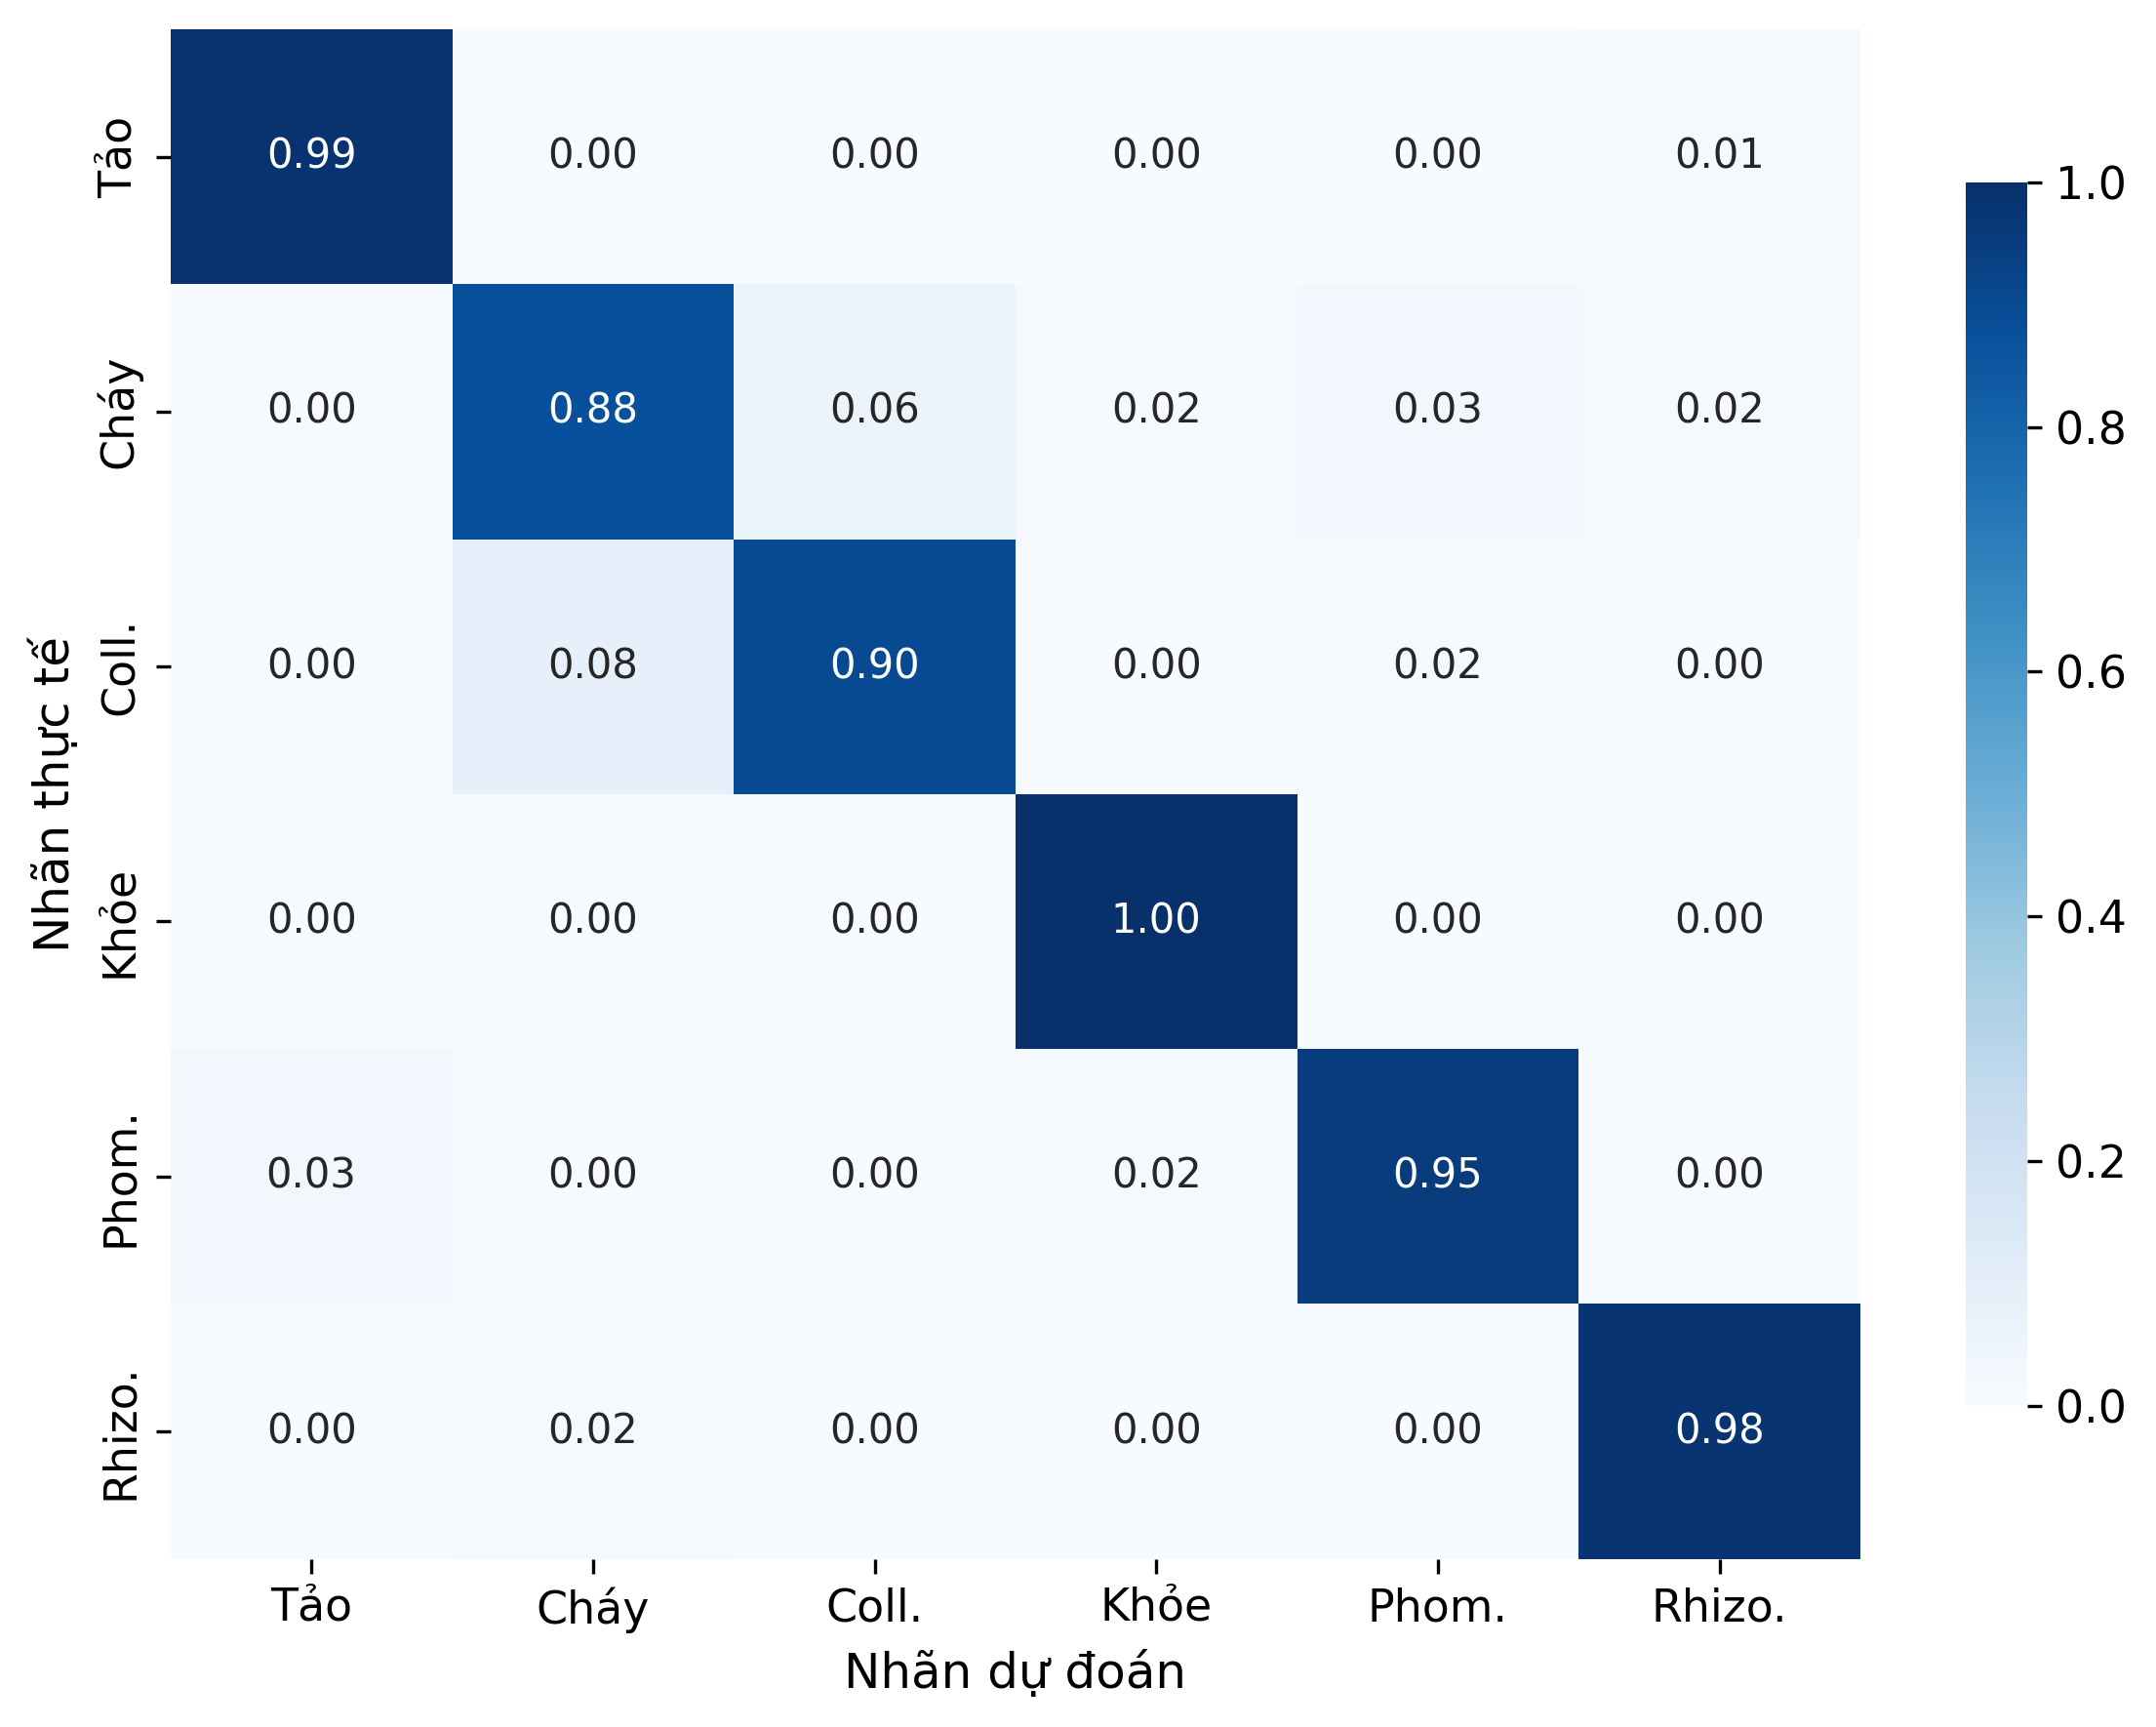

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib as mpl

# --- Cấu hình hiển thị học thuật ---
mpl.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'axes.titlesize': 13,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'figure.dpi': 300,
})

# --- Mapping class sang tiếng Việt ---
name_map = {
    'Leaf_Blight': 'Cháy',
    'Leaf_Rhizoctonia': 'Rhizo.',
    'Leaf_Phomopsis': 'Phom.',
    'Leaf_Algal': 'Tảo',
    'Leaf_Colletotrichum': 'Coll.',
    'Leaf_Healthy': 'Khỏe'
}

# --- Lấy danh sách nhãn gốc từ dataset ---
class_names_en = val_dataset.classes
class_names_vi = [name_map.get(c, c) for c in class_names_en]

# --- Báo cáo phân loại ---
print(classification_report(y_true_class, y_pred_class, target_names=class_names_vi))

# --- Tạo ma trận nhầm lẫn ---
cm = confusion_matrix(y_true_class, y_pred_class, normalize='true')

# --- Vẽ Heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(
    cm, annot=True, fmt='.2f', cmap='Blues',
    xticklabels=class_names_vi,
    yticklabels=class_names_vi,
    cbar_kws={'shrink': 0.8}
)

plt.xticks(rotation=0, ha='center')   # chữ trục X nằm ngang
plt.yticks(rotation=0, ha='center')   

# --- Nhãn và tiêu đề ---
plt.xlabel('Nhãn dự đoán', fontsize=12)
plt.ylabel('Nhãn thực tế', fontsize=12)

plt.tight_layout()
plt.show()

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true_class, y_pred_class, average='macro')
recall = recall_score(y_true_class, y_pred_class, average='macro')
f1 = f1_score(y_true_class, y_pred_class, average='macro')

print(f"Precision (macro): {precision:.2f}")
print(f"Recall (macro): {recall:.2f}")
print(f"F1-score (macro): {f1:.2f}")

Precision (macro): 0.95
Recall (macro): 0.95
F1-score (macro): 0.95


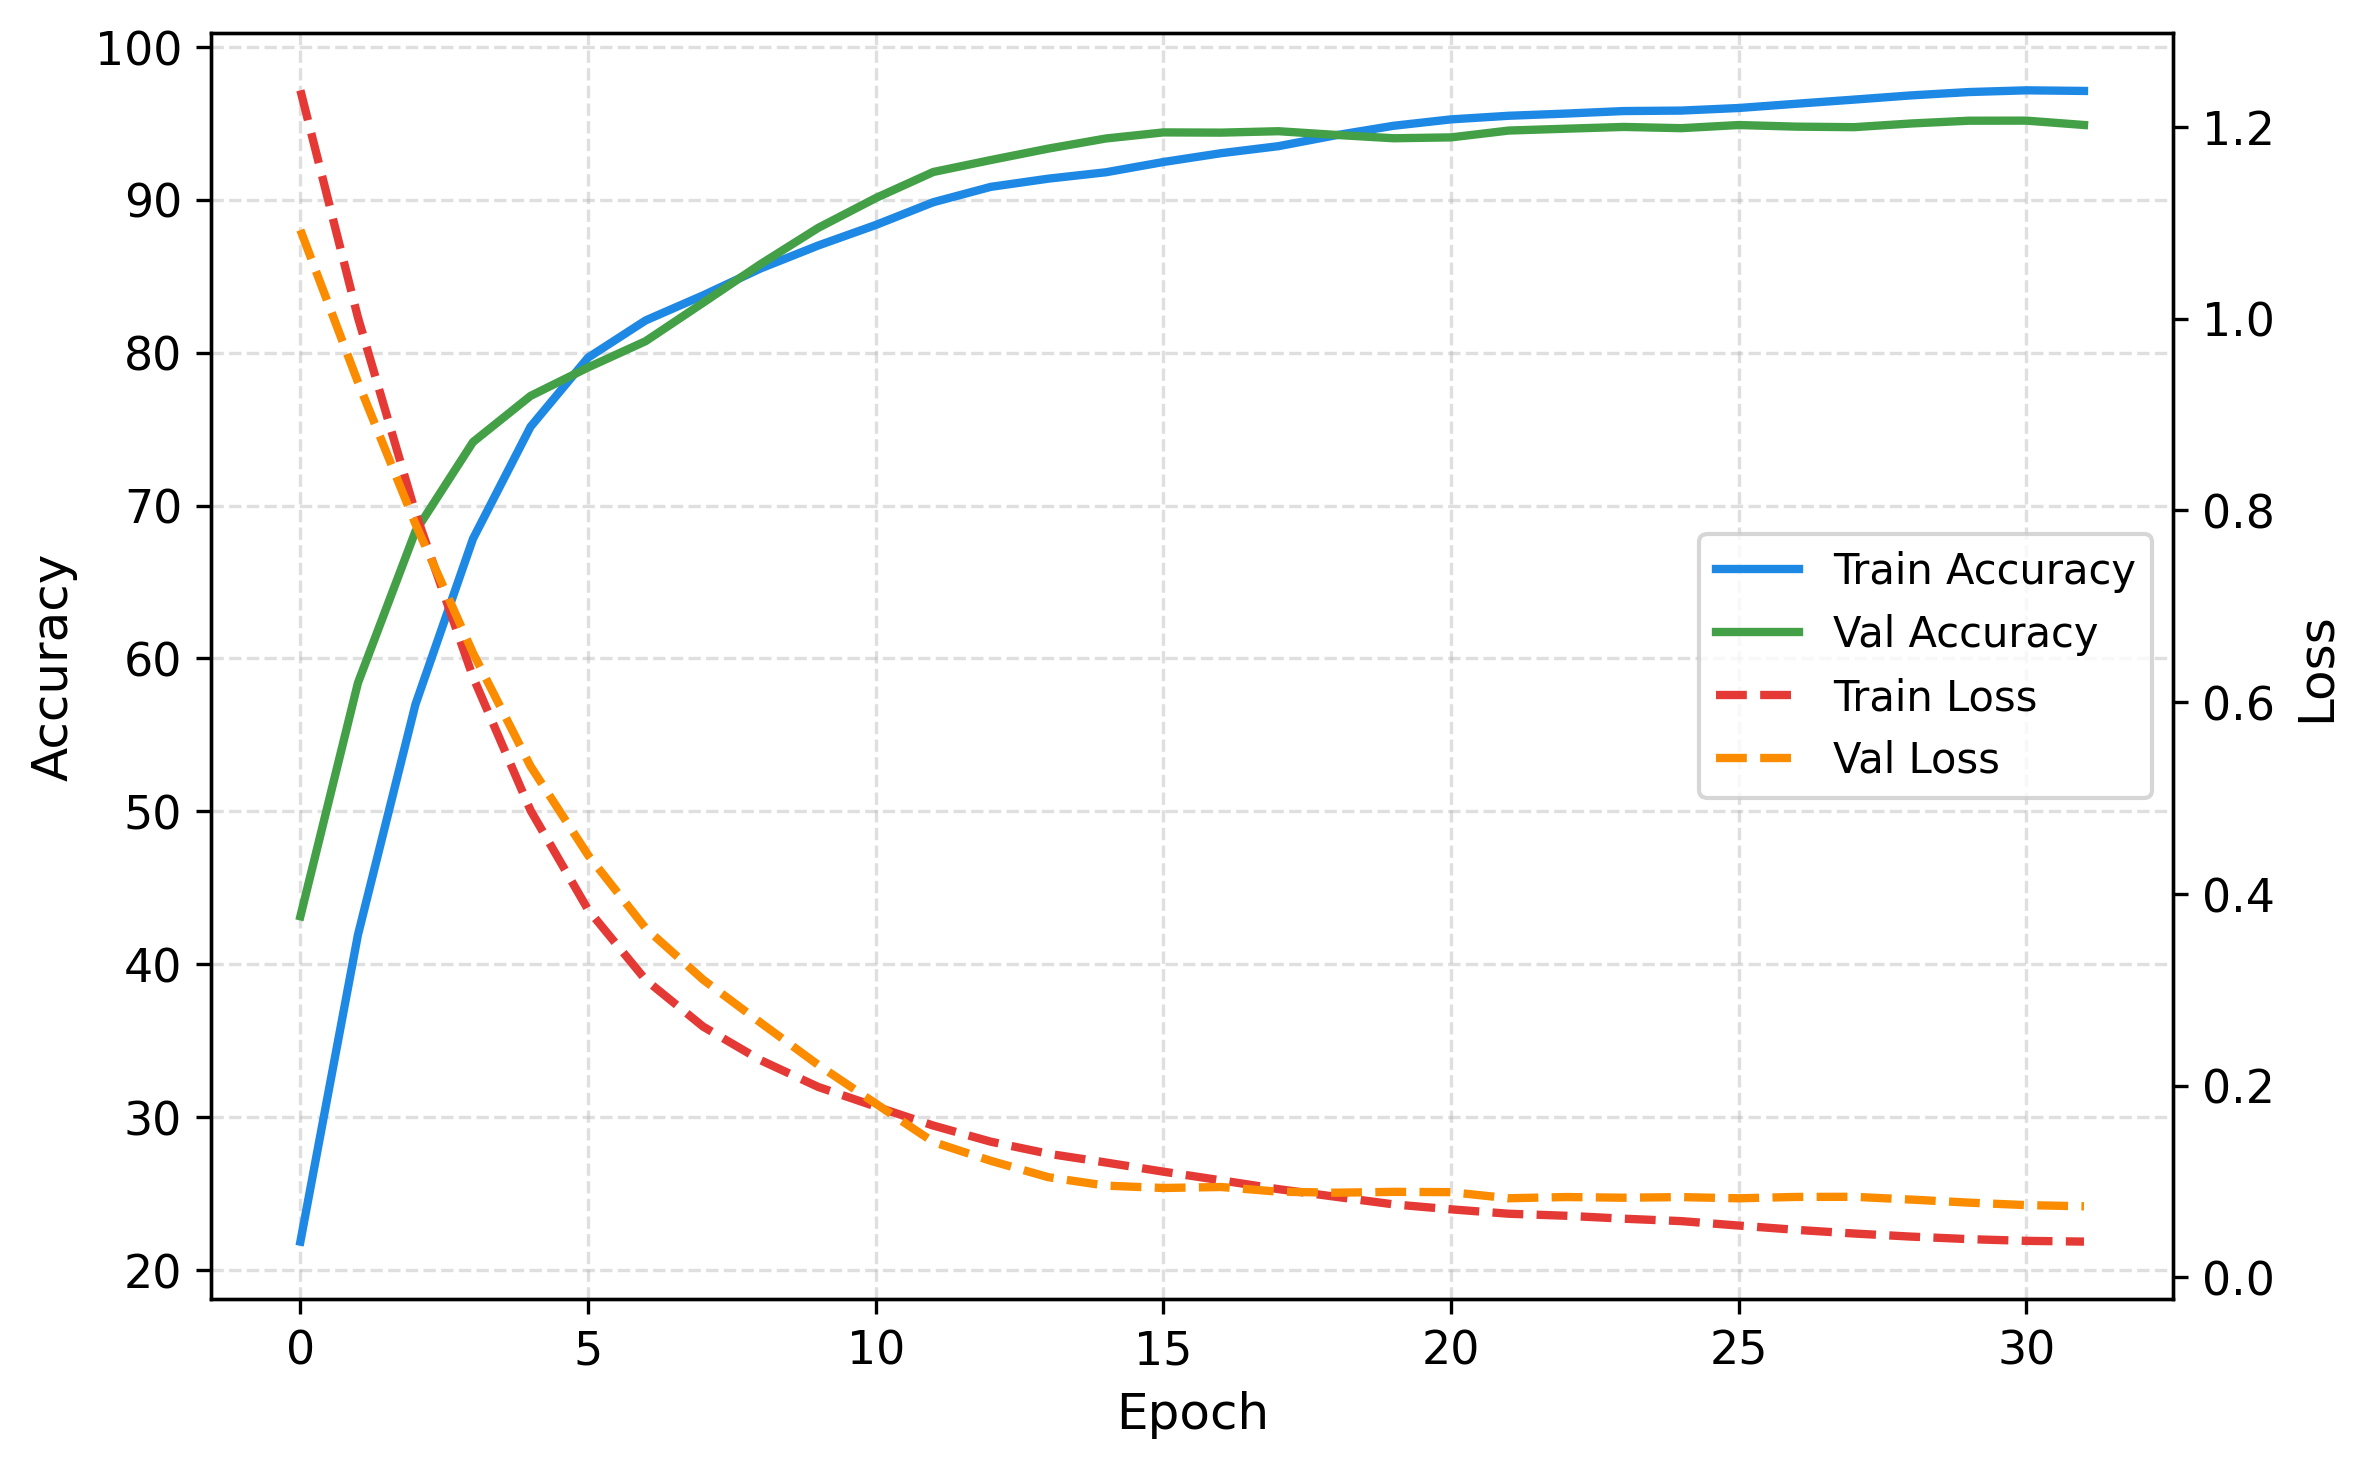

In [22]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

# Giả sử bạn đã có train_acc_l, val_acc_l, train_loss_l, val_loss_l
# Làm mượt bằng Savitzky-Golay filter
train_acc_smooth = savgol_filter(train_acc_l, 9, 3)
val_acc_smooth = savgol_filter(val_acc_l, 9, 3)
train_loss_smooth = savgol_filter(train_loss_l, 9, 3)
val_loss_smooth = savgol_filter(val_loss_l, 9, 3)

# Tạo figure
fig, ax1 = plt.subplots(figsize=(8,5))

# ===== Accuracy (trục trái) =====
line1, = ax1.plot(train_acc_smooth, label='Train Accuracy', color='#1E88E5', linewidth=2)
line2, = ax1.plot(val_acc_smooth, label='Val Accuracy', color='#43A047', linewidth=2)
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='y')

# ===== Loss (trục phải) =====
ax2 = ax1.twinx()
line3, = ax2.plot(train_loss_smooth, label='Train Loss', color='#E53935', linestyle='--', linewidth=2)
line4, = ax2.plot(val_loss_smooth, label='Val Loss', color='#FB8C00', linestyle='--', linewidth=2)
ax2.set_ylabel('Loss')
ax2.tick_params(axis='y')

# ===== Gộp legend từ cả hai trục =====
lines = [line1, line2, line3, line4]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='center right')

# ===== Thiết lập chung =====
ax1.set_xlabel('Epoch')
ax1.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

**Testing**

In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def test_model(model, test_loader, save_path, device, class_names=None):
    # 1. Load checkpoint
    model.load_state_dict(torch.load(save_path, map_location=device))
    model.to(device)
    model.eval()

    y_true, y_pred = [], []
    correct, total = 0, 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    test_acc = correct / total * 100
    print(f"Test Accuracy: {test_acc:.2f}%\n")

    # 2. Confusion Matrix (normalized)
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    # 3. Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=4, target_names=class_names))

    # 4. Vẽ Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".4f", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Normalized Confusion Matrix (per class accuracy)")
    plt.tight_layout()
    plt.show()

    return test_acc, y_true, y_pred


# --- Usage ---
model = DurNet(num_classes=6).to(device)
class_names = val_dataset.classes  # hoặc tự định nghĩa như ['A', 'B', 'C', ...]
test_acc, y_true, y_pred = test_model(model, test_loader, SAVE_PTH, device, class_names)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


RuntimeError: Error(s) in loading state_dict for DurNet:
	size mismatch for pos_embed: copying a param with shape torch.Size([1, 65, 128]) from checkpoint, the shape in current model is torch.Size([1, 50, 128]).